## SI 670 Applied Machine Learning, Week 2:  Basic supervised learning concepts (Due Wednesday 09/11/2024 11:59pm)

* Submit your completed notebook file to the Canvas site - **IMPORTANT**: please name your submitted file `si670f24_hw2_youruniqname.ipynb`

* As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates. If you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.



**Questions 1-3 are in SI 670 - Problem Set 2**

### Question 5 (13 points)

Your goal for this question is to run a simple linear regression on the data, and investigate its performance. Note that this question has multiple parts.

First you need to run the following block, which sets up the training and test datasets to be used for this question.

In [ ]:
import numpy as np

# We fix the state of the random number generator here in order to maintain consistency in the results
rs = np.random.RandomState(0)
X_train = rs.uniform(size = (100, 1))
y_train = 5 * X_train + 8
X_test = rs.uniform(size = (20, 1))
y_test = 7 * X_test + 1

Now, write a function that takes in training data as input, and fits a line to the data using a linear regression model. Your function should return the linear regression model.

In [ ]:
def fit_line(X_train, y_train):
    from sklearn.linear_model import LinearRegression

    # Your code: fit a linear regression model to the input data, name it `linreg'
    linreg = LinearRegression().fit(X_train, y_train)

    # Return the linear regression model you created
    return linreg

Run the following block of code in order to (1) compute the the $R^2$ (coefficient of determination) regression score on both training and test datasets, and then (2) plot the training and test datasets in the same figure, marked by different colors (blue for training data, red for test data).

R-squared score (training): 1.000
R-squared score (test): -11.533


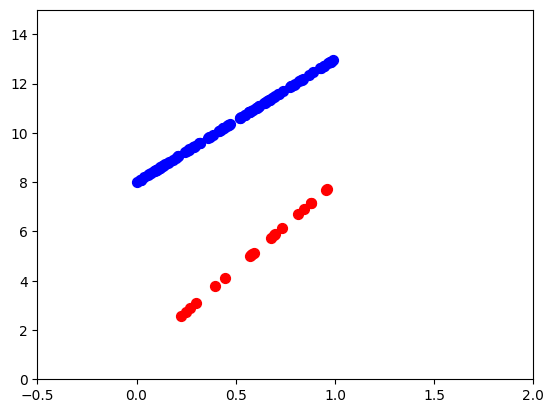

In [ ]:
# Fit a line to the dataset we generated at the beginning of this problem using your function
linreg = fit_line(X_train, y_train)

# Compute R^2 score of your model on training and test sets
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

# Plot the training and test datasets in the same figure marked by different colors
import matplotlib.pyplot as plt
fig = plt.figure()
plt.xlim(-0.5, 2)
plt.ylim(0, 15)
plt.scatter(X_train, y_train, c='blue', marker='o', s=50) # Blue points are from training dataset
plt.scatter(X_test, y_test, c='red', marker='o', s=50) # Red points are from test dataset

What does the $R^2$ score of your model on the two datasets tell you about the performance of your model? Using the plot of the two datasets, why do you think we get these $R^2$ scores? Please provide your answer in the text cell below.

**Please insert your answer here**


Training data is not similar to test data, a violation of underlying assumptions in machine learning.

### Question 5 (20 points) Bias and Variance

## (a) 10 points
Your task is to investigate the influence of different regularization parameters on the coefficients of a regression model.

Given 10 points around the function $y = x^2 + 2x + 1$. You are asked to train a linear regression with degree 6 polynomial features. And run it with different regularization parameters $\alpha \in \{0,0.1,1,10,100\}$.

Plot the polynomials from your regression results corresponding to each regularization parameter in one figure.

**Hint:** One way to plot the polynomial from your regressions is to create a dataset with a bunch of data points for the x values, then use your model to predict the outputs for these x values. Finally, use plt.plot(my_x_values, predicted_y_values) to show the polynomial predicted by the model.


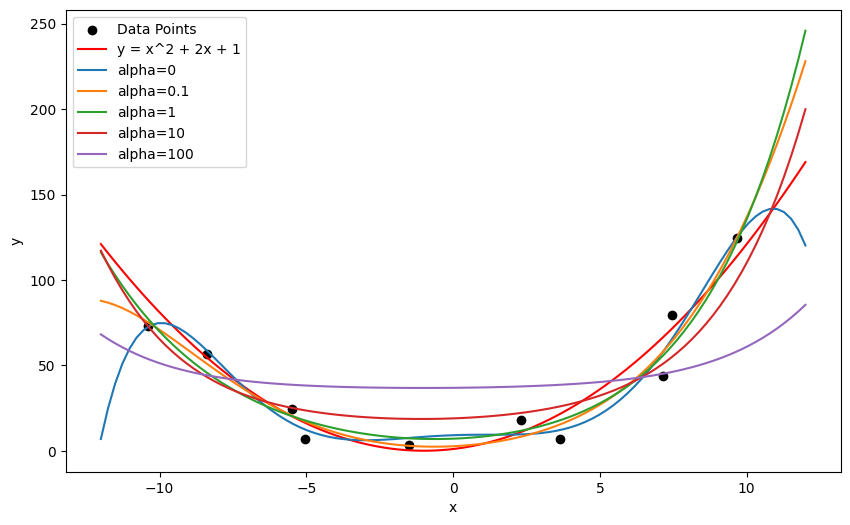

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

def answer_four():
    x_list = np.array([-10.38446879, -8.38394902, -5.47700112, -5.04337481, -1.50548227, 3.65324449, 2.32253022, 7.14588818, 7.44347003, 9.67771813]).reshape(-1, 1)
    y_list = np.array([73.21995367, 56.4250573, 24.15989601, 7.14325154, 3.45955269, 6.68448382, 17.93465674, 44.02585723, 79.55124013, 124.46649205]).reshape(-1, 1)

    # Generate original x values
    x_original = np.linspace(-12, 12, 100).reshape(-1, 1)

    # Generate y values based on the function y = x^2 + 2x + 1
    y_original = x_original**2 + 2*x_original + 1

    # Plot the original function and the data points
    plt.figure(figsize=(10, 6))
    plt.scatter(x_list, y_list, label='Data Points', color='black')
    plt.plot(x_original, y_original, label='y = x^2 + 2x + 1', color='red')

    for alpha in [0, 0.1, 1, 10, 100]:
        # Make a pipeline: Polynomial features -> Standardization -> Ridge Regression
        model = make_pipeline(PolynomialFeatures(degree=6), StandardScaler(), Ridge(alpha=alpha))
        model.fit(x_list, y_list)

        # Predict y values for the original x values
        y_pred = model.predict(x_original)

        plt.plot(x_original, y_pred, label=f'alpha={alpha}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

answer_four()


## (b) 10 points

We then give you a data generator that gives 10 data points around the function $y = x^2 + 2x + 1$ each time you run **data_gen()**.

We would like you to consider the bias and variance of a 6-degree polynomial classifier. In particular, for each of the regularization parameters $\alpha \in \{0,0.1,1,10,100\}$ we would like you to calculate the bias and variance over 1000 generated data sets from **data_gen()**.

To do so, you will need to calculate the bias and variance with respect to a particular data point. Please use $x^*=0, y^*=1$ for this data point.

For more context on how to calculate bias and variance, refer back to the slides from lecture 6.

**In addition**, briefly describe how the bias and variance change when the regularization parameter increases. If you are unable to finish the coding portion, please explain how you would expect bias and variance to change.

In [ ]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline

def data_gen(n=10):
    x_original = np.linspace(-10, 10, n)
    y_original = x_original**2 + 2*x_original + 1
    noise_strength_x = 1.0
    noise_strength_y = 5.0
    x_noisy = x_original + noise_strength_x * np.random.randn(n)
    y_noisy = y_original + noise_strength_y * np.random.randn(n)
    return x_noisy, y_noisy

def answer_four_1():
    num_trials = 1000
    alphas = [0, 0.1, 1, 10, 100]
    bias_list = []
    variance_list = []

    x_star = np.array([[0]])  # The point at which we want to evaluate bias and variance
    y_star = 1  # The true y-value at x=5 according to the function y = x^2 + 2*x + 1

    for alpha in alphas:
        predictions_at_x_star = []

        #get a new dataset for each of the 1000 trials
        for i in range(num_trials):
            x_noisy, y_noisy = data_gen()
            model = make_pipeline(PolynomialFeatures(degree=6), MinMaxScaler(), Ridge(alpha=alpha))
            model.fit(x_noisy.reshape(-1, 1), y_noisy)

            #predict a value for y* using x*
            y_pred = model.predict(x_star)
            predictions_at_x_star.append(y_pred)

        # Convert to numpy array for easier calculations
        predictions_at_x_star = np.array(predictions_at_x_star).reshape(-1)

        # Calculate bias at x_star, y_star
        bias = np.mean((predictions_at_x_star - y_star))
        bias_list.append(bias)

        # Calculate variance at x_star, y_star
        variance = np.var(predictions_at_x_star)
        variance_list.append(variance)

    return bias_list, variance_list

print(answer_four_1())


([np.float64(0.2782526372081976), np.float64(7.426922515042738), np.float64(17.833204657997392), np.float64(33.707220811359555), np.float64(39.801128243506724)], [np.float64(50.367979273782595), np.float64(10.523492709414207), np.float64(12.832910196586093), np.float64(5.296778700409282), np.float64(2.6757351779814353)])


## Explanation
As our regularization increases, we find an increase in the bias and decrease in the variance. This is because we are increasingly constraining our model's flexibility to fit arbitrary data by placing limits on the sum of the squared coefficients.

### Question 6 (15 points) Regression to the mean

Imagine you are working on a regression problem with six features.

You will:

1. Generate synthetic data.

2. Split data into training, validation, and test sets, with a ratio of 6:2:2

3. Train two different linear regression models (one with Ridge regularization term with $\alpha = 0.2$ and one standard linear regression model).

4. Evaluate both models on the validation data with Mean Squared Error.

5. Suppose that for each time you will apply the "better" model according to the MSE on the validation data, evaluate it on the test data.

Repeat this 1000 times.  Each time calculate the average of the error of the "better" model on validation data and test data respectively (so you will only record the error of the better model on the validation data, and the error of this same model on the test data.)

Which average error is smaller? Why do you expect this (or not expect this)?

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def answer_five():
    count = 0
    for _ in range(100):

        # Generate synthetic data
        X = 2 * np.random.rand(100, 3)  # 100 samples, 3 features
        y = 10 + np.dot(X, np.array([3, 5, 2])) + 2 * np.random.randn(100)

        # Your code here
        # Split data into training, validation, and test sets, with a ratio of 6:2:2



        # Train two models
        # Model 1: Linear Regression


        # Model 2: Ridge Regression with alpha 1

        
        # Evaluate on validation set
        val_mse1 = 0
        val_mse2 = 0

        print(f"Validation MSE for Linear Regression: {val_mse1}")
        print(f"Validation MSE for Ridge Regression: {val_mse2}")

        # Choose the "better" model based on validation MSE



        # Evaluate both models on the test set for comparison
        test_mse1 = 0
        test_mse2 = 0

        print(f"Test MSE for Linear Regression: {test_mse1}")
        print(f"Test MSE for Ridge Regression: {test_mse2}")

        if ((val_mse1 > val_mse2) and (test_mse1 < test_mse2)) or ((val_mse1 > val_mse2) and (test_mse1 < test_mse2)):
            count += 1

    print(count)

# answer_five()

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def answer_five():
    sum1 = 0
    sum2 = 0
    for _ in range(1000):
        # Generate synthetic data
        X = 2 * np.random.rand(50, 6)  # 50 samples, 5 features
        y = 10 + np.dot(X, np.array([3, 5, 2, 0, 0, 0])) + 2 * np.random.randn(50)

        # Split data into training, validation, and test sets
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

        # Train two models
        model1 = LinearRegression()
        model1.fit(X_train, y_train)

        model2 = Ridge(alpha=0.2)
        model2.fit(X_train, y_train)

        # Evaluate on validation set
        val_pred1 = model1.predict(X_val)
        val_mse1 = mean_squared_error(y_val, val_pred1)

        val_pred2 = model2.predict(X_val)
        val_mse2 = mean_squared_error(y_val, val_pred2)

        # print(f"Validation MSE for Linear Regression: {val_mse1}")
        # print(f"Validation MSE for Ridge Regression: {val_mse2}")

        test_pred1 = model1.predict(X_test)
        test_mse1 = mean_squared_error(y_test, test_pred1)

        test_pred2 = model2.predict(X_test)
        test_mse2 = mean_squared_error(y_test, test_pred2)

        if val_mse1 < val_mse2:
            sum1 += val_mse1
            sum2 += test_mse1
        else:
            sum1 += val_mse2
            sum2 += test_mse2

        # print(f"Test MSE for Linear Regression: {test_mse1}")
        # print(f"Test MSE for Ridge Regression: {test_mse2}")

    print(sum1/1000, sum2/1000)
answer_five()


5.091677759052748 5.113349539116914


**Your answer here:**

## Explanation 
We have larger MSE on the test set than validation set due to regression to the mean. We've chosen the model that performs best on the validation set, but we shouldn't expect that it will perform as well on the test set. When we choose an extreme value (even between two values like in this example), this value is not likely to be representative of the data. 

### Preliminary for Q7 and Q8
Before continuitng on to the next question, run the following block to set up the variables needed for later sections. It generates training and test data that we're going to use to fit a non-linear function (as opposed to the traditional linear regression problems you saw in the previous questions).

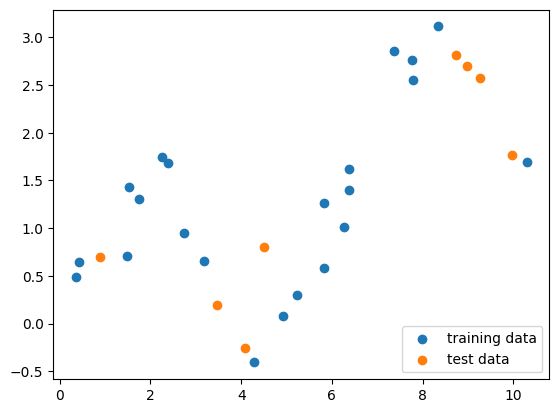

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(0)
n = 30
x = np.linspace(0, 10, n) + np.random.randn(n) / 5
y = np.sin(x) + x / 4 + np.random.randn(n) / 3


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

# You can use this function to help you visualize the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);


part1_scatter()  # let's plot the training and test data for the upcoming questions.

### Question 7(10 points)

Write a function that fits a polynomial curve to the data, by using a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Recall that we use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model to those extended features). For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

Note that you can run the `plot_two()` function to see the fitted curves on top of the dataset.

<br>
*This function should return a numpy array with shape `(4, 100)`*


In [ ]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here
    res = []
    for d in [1, 3, 6, 9]:
        poly = PolynomialFeatures(degree=d)
        X_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_trans, y_train)
        x_line = poly.transform(np.linspace(0,10,100).reshape(-1, 1))
        y_pred = linreg.predict(x_line)
        res.append(y_pred)

    return np.array(res)

answer_two()

array([[ 0.49947299,  0.51663261,  0.53379223,  0.55095185,  0.56811148,
         0.5852711 ,  0.60243072,  0.61959034,  0.63674996,  0.65390958,
         0.6710692 ,  0.68822883,  0.70538845,  0.72254807,  0.73970769,
         0.75686731,  0.77402693,  0.79118655,  0.80834617,  0.8255058 ,
         0.84266542,  0.85982504,  0.87698466,  0.89414428,  0.9113039 ,
         0.92846352,  0.94562315,  0.96278277,  0.97994239,  0.99710201,
         1.01426163,  1.03142125,  1.04858087,  1.06574049,  1.08290012,
         1.10005974,  1.11721936,  1.13437898,  1.1515386 ,  1.16869822,
         1.18585784,  1.20301747,  1.22017709,  1.23733671,  1.25449633,
         1.27165595,  1.28881557,  1.30597519,  1.32313482,  1.34029444,
         1.35745406,  1.37461368,  1.3917733 ,  1.40893292,  1.42609254,
         1.44325216,  1.46041179,  1.47757141,  1.49473103,  1.51189065,
         1.52905027,  1.54620989,  1.56336951,  1.58052914,  1.59768876,
         1.61484838,  1.632008  ,  1.64916762,  1.6

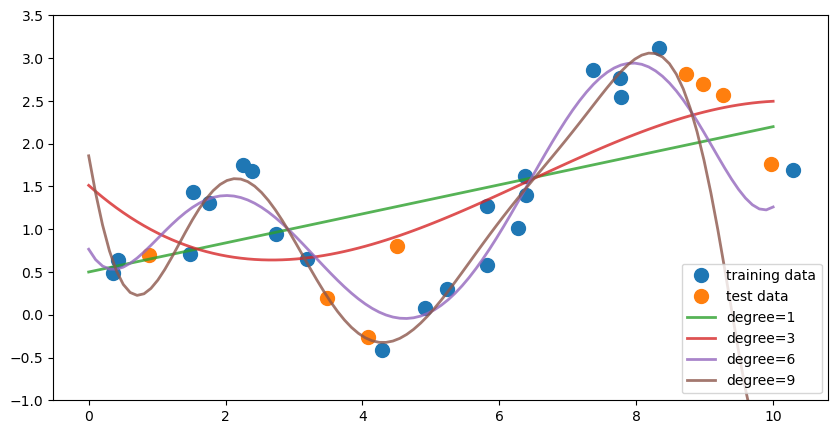

In [ ]:
# feel free to use the function plot_one() to replicate the figure
# from the prompt once you have completed question one
def plot_two(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,3.5)
    plt.legend(loc=4)

plot_two(answer_two())

### Question 8 (10 points)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

Based on these $R^2$ values (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? Please explain your reasoning. Note: there may be multiple correct solutions to this question.

(Hint: you can plot the r2_train and r2_test vs the degree to investigate underfitting/overfitting.)

*This function should return one tuple of numpy arrays `(r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)`, where both `r2_train` and `r2_test` should have shape `(10,)`, and `Underfitting, Good_Generalization, Overfitting` should be three lists of int partitioning 0-9.*

In [ ]:

def answer_three():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    # Your code here

    r2_train = []
    r2_test = []
    for d in range(10):
        poly = PolynomialFeatures(degree=d)
        X_train_trans = poly.fit_transform(X_train.reshape(-1, 1))
        linreg = LinearRegression().fit(X_train_trans, y_train)
        X_test_trans = poly.transform(X_test.reshape(-1, 1))

        r2_train.append(linreg.score(X_train_trans, y_train))
        r2_test.append(linreg.score(X_test_trans, y_test))

    # Possible answers (award points as long as their answers follow this):
    # 0 - Underfitting
    # 1 - Underfitting
    # 2 - Underfitting / Good_generalization
    # 3 - Underfitting / Good_generalization
    # 4 - Good_generalization
    # 5 - Good_generalization
    # 6 - Good_generalization
    # 7 - Overfitting
    # 8 - Good_generalization / Overfitting
    # 9 - Overfitting

    Underfitting = [0, 1]
    Good_Generalization = [2, 3, 4, 5, 6]
    Overfitting = [7, 8, 9]


    return (r2_train, r2_test, Underfitting, Good_Generalization, Overfitting)



answer_three()


([0.0,
  0.2643975500223753,
  0.3274235761846298,
  0.37220126357975103,
  0.8673604496714565,
  0.8714478477112118,
  0.9133574409486216,
  0.9365234357859938,
  0.9384067915707173,
  0.9406850610887607],
 [-0.010639689448016743,
  0.5404084766379273,
  0.6426655069520221,
  0.7638109083466662,
  0.6592259101704382,
  0.7573712228484664,
  0.7713032362942465,
  0.38779951600162266,
  0.8104206526624393,
  -0.5929395477137571],
 [0, 1],
 [2, 3, 4, 5, 6],
 [7, 8, 9])

## Explanation:
- One indicator of overfitting or underfitting is the relationship between the train R^2 and the test R^2. When the both are low, this is a sign that our model is not fitting the data appropriately, which is underfitting. When train R^2 and test R^2 are similar, this is an indicator that our model is fitting the data well in a way that generalizes to out-of-sample (unseen) data. Finally, when train R^2 is higher than test R^2, this is a sign that our model is fitting the noise from the training data, which is overfitting.

## Disclosure

**If you used ChatGPT for any of the questions above, please disclose which questions you used it for, and how you used it.**

**Disclosure here:**